# Equação de onda

A equação que governa a evolução no tempo e no espaço de uma perturbação numa corda, é um dos primeiros problemas a ser tratado num curso de Física (OMC). De certo modo pode ser visto como uma evolução do oscilador harmónico simples: passar de um grau de liberdade (espacial) para um contínuo, ou seja um número infinito de graus de liberdade.

A equação de onda já estudada é linear (embora isso em geral resulte de um conjunto de aproximações, retendo a ordem mais baixa de vários efeitos). Como tal, existem métodos para a resolver exactamente (p.ex. usando decomposição de Fourier), embora por vezes possa aparecer como uma série infinita! Os métodos numéricos pareceriam não ter grande lugar aqui. Mas recordemos que a equação de onda é em geral estudada (ou aproximada!) para estudar meios homogéneos, ou, quando muito, homogéneos por partes (cf. reflexão e transmissão de ondas na interface entre dois meios homogéneos!). Se tivermos um meio inomogéneo, os métodos habituais não nos permitem obter a solução. 

## Equação de onda em 1D num meio homogéneo

Consideremos o problema de uma onda a propagar-se no domínio $x\in [0,L]$, com um perfil inicial $I(x)$ conhecido, e com as extremidades da corda fixas:

\begin{align*}
\frac{\partial^2 u}{\partial t^2} &=
c^2 \frac{\partial^2 u}{\partial x^2}, \quad & x \in [0,L],\ t\in [0,T]
\\ 
u(x,0) &= I(x), \quad &x\in [0,L]
\\ 
\frac{\partial}{\partial t}u(x,0) &= 0, \quad &x\in [0,L]
\\ 
u(0,t) & = 0, \quad  &t\in [0,T]
\\ 
u(L,t) & = 0, \quad  &t\in [0,T]
\end{align*}


A velocidade de propagação obtém-se das característcas da corda (a sua densidade linear, $\rho$) e das condições de uso (tensão a que está sujeita, $T$), $c=\sqrt{T/\rho}$. Tal como na equação de difusão, a segunda derivada no espaço pede-nos 2 condições, chamadas de fronteira. Resultam das condições físicas nas extremidades da corda, ou sejam, como está "presa". Pode estar amarrada, ou fixa (Dirichlet), pode estar livre (ausência de força de retorno transversal nas extremidades) (Neumann), ou ser presa via dobradiças (a segunda derivada e o deslocamento são nulos),etc. No enunciado acima supomos que temos deslocamentos nulos (Dirichlet). (Matematicamente, o(s) ponto(s) onde nos é dada alguma informação pode ser qualquer! Têm é que ser duas condições.)
Mas diferindo da equação de calor, temos agora no tempo uma segunda derivada. Matematicamente obriga-nos a ter duas condições para fixar a solução particular do nosso problema. Físicamente quer dizer que, para além do perfil inicial, temos que saber a velocidade inicial de cada ponto. Acima supomos que parte do repouso (velocidade nula), e tem um perfil dado por $I(x)$.

Como habitualmente, para resolver o problema numericamente começamos por definir a grelha computacional. Vamos dividir o domínio espacial em $N_x+1$ pontos (teremos assim $N_x$ subintervalos!) e o domínio temporal em $N_t+1$ instantes, de modo que teremos nodos com:

$$
x_i = i\Delta x,\ i=0,\ldots,N_x,\;\;\;\;\;\;\;\;
$$

Assim a equação de onda é satisfeita em todos os pontos interiores da grelha:

$$
\frac{\partial^2}{\partial t^2} u(x_i, t_n) =
c^2\frac{\partial^2}{\partial x^2} u(x_i, t_n),
$$

para $i=1,\ldots,N_x-1$ e $n=1,\ldots,N_t-1$. Para $n=0$ temos as duas condições iniciais $u = I(x)$ e $u_t = 0$, e nos pontos da fronteira $i=0, N_x$ temos as condições fronteira $u=0$.


Escolhendo diferenças centrais para ambas as segundas derivadas, obtemos a versão discretizada da PDE:

$$
\frac{u_i^{n+1} - 2u_i^n + u^{n-1}_i}{\Delta t^2} =
c^2\frac{u_{i+1}^{n} - 2u_i^n + u^{n}_{i-1}}{\Delta x^2},
$$

que pode ser resolvida em ordem $u_i^{n+1}$:

$$
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
\left(u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}\right),
$$

onde definimos $C\equiv c\Delta t/ \Delta x$, e que é conhecido por número de Courant (ou de Courant-Friederichs-Lewy, CFL). Note-se que para calcular $u_i^{n+1}$, precisamos de saber $u$ em dois tempos anteriores, nomeadamente $u_i^{n}$ e $u_i^{n-1}$. Isso põe imediatamente o problema de como começar o algoritmo, pois só temos informação num tempo, $t_0=0$. Ou não? Na verdade, temos a segunda condição inicial, $u_t=0$! Para a utilizar numericamente precisamos igualmente discretizá-la. Escolhendo diferenças centrais, o que nos dá um erro de truncagem da mesma ordem dos esquemas escolhidos para as segundas derivadas, podemos escrever:

$$ u_t=0 \Rightarrow \frac{u_i^{n+1}-u_i^{n-1}}{2\Delta t} = 0 \Rightarrow u_i^{n+1}=u_i^{n-1}, \quad i=0,\ldots,N_x$$

A outra condição inicial é simplesmente:

$u_i^0 = I(x_i),\;\;\;\; i=0,\ldots,N_x.$

O algoritmo pode então ser começado em $t_0=0$ alterando a fórmula geral (3) com o resultado (4):

$$
u_i^1 = u^0_i + \frac{1}{2}
C^2\left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right)
.$$

### Algoritmo

* calcular $u_i^0=I(x_i)$ para $i=0,\ldots,N_x$

* calcular $u^1_i$ via (5) e fazer $u^1_i=0$ para os pontos da fronteira $i=0$ e $i=N_x$,

* para cada tempo $n=1,2,\ldots,N_t-1$

    * aplicar (3)  para obter $u^{n+1}_i$ para $i=1,\ldots,N_x−1$
    
    * pôr $u^{n+1}_i=0$ para os pontos da fronteira $i=0$, $i=N_x$.


O stencil associado é o da figura:
<img src="../imagens/wave_eq_stencil1.gif" alt="drawing" width="350"/>




Para implementar o algoritmo acima precisamos de guardar a variável em 3 instantes. Sejam `u` a variável no instante a calcular (futuro), `u_1` a variável no instante calculado mais recente (presente) e `u_2` a variável no instante anterior a esse (passado).

Podemos sempre armazenar $u_i^n$ em todos os instantes $n=0,\ldots,N_t$, mas isso fica "caro" a não ser nos problemas mais pequenos. É em geral suficiente _armazenar/escrever/plot_ a intervalos pré-selecionados.

Um exemplo de implementação é o código seguinte:

Número de Courant é 1.00000000


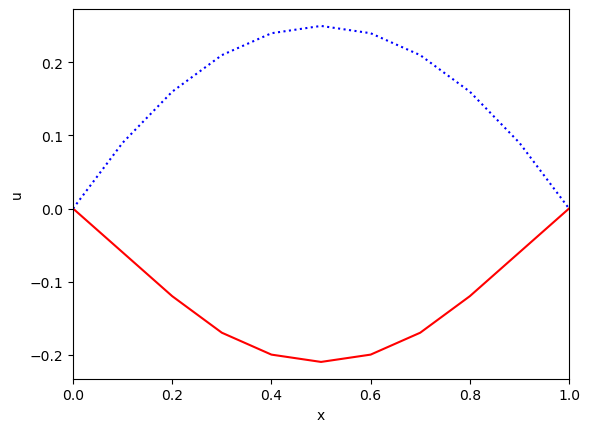

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Nx   = 10
Nt   = 12
xmax = 1.0
tmax = 1.2

x    = np.linspace(0., xmax, Nx+1)
t    = np.linspace(0., tmax, Nt+1)
# 
dx   = x[1] - x[0]
dt   = t[1] - t[0]

c    = 1.
C    = c*dt/dx            # número de Courant

C2   = C**2              # variável auxiliar
print('Número de Courant é %.8f' %C)

def I(x,t):
    return x*(xmax-x)*(1-t/2)  # esta função é condição inicial

u    = np.zeros(len(x))
u_1  = u.copy()
u_2  = u.copy()
#print(u.shape,u_1.shape, u_2.shape)

# Impôr condição inicial u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i],0)

# Aplicar a fórmula especial no primeiro passo, com du/dt=0 incorporada
for i in range(1, Nx):
    u[i] = u_1[i] + 0.5*C2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])
u[0] = 0;  u[Nx] = 0   # Impôr condições fronteira

# Trocar papel das variáveis antes do próximo passo (presente passa a passado, futuro passa a presente)
u_2[:], u_1[:] = u_1, u

for n in range(1, Nt):
    # Actualizar todos os nodos interiores no instante t[n+1]
    for i in range(1, Nx):
        u[i] = 2*u_1[i] - u_2[i] + \
                C2*(u_1[i+1] - 2*u_1[i] + u_1[i-1])

    # Aplicar condições fronteira
    u[0] = 0;  u[Nx] = 0

    # Trocar papel das variáveis antes do próximo passo
    u_2[:], u_1[:] = u_1, u

plt.plot(x, u,'r', x, I(x,0),'b:')
plt.xlim(0., xmax)
plt.xlabel('x')
plt.ylabel('u')
plt.show()

### Estabilidade

A estabilidade do esquema explícito pode ser estudada pela análise de von Neumann. Supomos uma solução da forma $u(x,t)=A(t)e^{i\omega x}$. Assumimos que a evoluçãp temporal da amplitude é tal que:
$$\frac{A(t+\Delta t)}{A(t)}=\frac{A(t)}{A(t-\Delta t)}=\lambda.$$

Substituindo na equação para o esquema explícito, obtemos:
$$
\lambda A(t)e^{i\omega x} = 2(1-C^2)e^{i\omega x}-\frac{A(t)}{\lambda}e^{i\omega x} + C^2A(t)e^{i\omega x} (e^{i\omega \Delta x} + e^{-i\omega \Delta x}).
$$
Simplificando vem;
$$
\lambda^2-2\left( 1-2C^2\sin^2\left( \frac{\omega \Delta x}{2}\right) \right)\lambda +1=0
$$
ou
$$
\lambda^2-2\alpha\lambda +1=0,
$$
onde $\alpha \equiv \left( 1-2C^2\sin^2\left( \frac{\omega \Delta x}{2}\right) \right)$.
O valor de $\alpha$ é limitado por $1$ e $1-2C^2$. Neste último caso a solução da equação quadrática é:
$$
\lambda = \alpha \pm \sqrt{\alpha^2-1}= 1-2C^2 \pm 2C\sqrt{C^2-1}.
$$

Se $C>1$, o factor de amplificação $\lambda>1$ e o esquema é instável. Se $C=1$, $\lambda=-1$ (valor absoluto igual a 1) e o esquema é estável. Se $C<1$, $\lambda$ é complexo com valor absoluto igual a 1. O esquema explícito é então condicionalmente estável, para $C \le 1$.

### Esquema implícito (Crank-Nicholson)

Tal como fizemos antes para o esquema de Crank-Nicholson no caso da equação de calor, neste esquema implícito, para a segunda derivada no espaço tomamos a média entre os tempos $t-\Delta t/2$ e $t+\Delta t/2$, que por sua vez são calculados como a média entre os tempos $t-\Delta t$ e $t$, e entre $t$ e $t+\Delta t$, respectivamente:

$$
\left.\frac{\partial^2 u}{\partial x^2}\right|_{i,k}=
\frac{(u_{i-1}^{k+1}-2u_{i}^{k+1}+u_{i+1}^{k+1})
+2(u_{i-1}^{k}-2u_{i}^{k}+u_{i+1}^{k}) + (u_{i-1}^{k-1}-2u_{i}^{k-1}+u_{i+1}^{k-1})}{4\Delta x^2}
$$

A segunda derivada em ordem ao tempo é feita da mesma maneira que no esquema explícito.
Reunindo os resultados e fazendo alguma arrumação dos termos chegamos à formulação do esquema implícito como:

$$
-u_{i-1}^{k+1} +2\left( 1+\frac{2}{C^2} \right) u_{i}^{k+1} - u_{i+1}^{k+1}=
2\left[ u_{i-1}^{k} -2\left( 1-\frac{2}{C^2} \right) u_{i}^{k} + u_{i+1}^{k}\right]
+ u_{i-1}^{k-1} -2\left(1+\frac{2}{C^2} \right)u_{i}^{k-1} + u_{i+1}^{k-1}
$$

que tem uma forma tridiagonal!
Para o primeiro passo podemos usar diferenças centrais para  a velocidade, o que leva ao resultado:

$$
-u_{i-1}^{1} +2\left( 1+\frac{2}{C^2} \right) u_{i}^{1} - u_{i+1}^{1}=
\left[ f_{i-1} -2\left( 1-\frac{2}{C^2} \right) f_{i} + f_{i+1}\right]
-\Delta t \left[ g_{i-1} -2\left( 1+\frac{2}{C^2} \right) g_{i} + g_{i+1}\right]
$$

(Aqui os $g_i$ representam os valores da velocidade no instante inicial, se não forem zero. Os $f_{i}$ são a posição inicial.)
### Estabilidade do esquema implícito
Seguindo um processo análogo obtemos na análise de von Neumann:
$$
\lambda^2 +2\lambda \left[ 
\frac{1-\frac{2}{C^2}- \cos(\omega \Delta x)}{1+\frac{2}{C^2}- \cos(\omega \Delta x)}
\right]  +1 =0.
$$
A solução desta equação quadrática é:

$$
\lambda = \frac{\left[\sin^2 \left(\frac{\omega \Delta x}{2}\right)-\frac{1}{C^2}\right] \pm  i \frac{2}{C^2} \sin^2 \left(\frac{\omega \Delta x}{2}\right) }{\left[\sin \left(\frac{\omega \Delta x}{2}\right)+\frac{1}{C^2}\right]}.
$$

A amplitude de $\lambda$ é 1 para qualquer valor de $C$. Assim o método implícito é incondicionalmente estável.

#### Análise da estabilidade

Podemos generalizar o problema de modo a admitir um termo fonte, que poderá ser útil na realização de testes de verificação do código. Nesse caso a discretização fica:

$$
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + 
    C^2(u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 f^n_i $$
    
Um método consiste em escolher uma solução e andar para trás no processo, ié, substituir a solução na equação e determinar assim a fonte, as condições iniciais, e as condições fronteira. Por exemplo, podemos escolher a solução:

$$
{u_{\small\text{e}}}(x,t) = A\sin\left(\frac{\pi}{L}x\right)
    \cos\left(\frac{\pi}{L}ct\right).$$
    
Esta solução verifica a PDE com $f=0$, condições fronteira ${u_{\small\text{e}}}(0,t)={u_{\small\text{e}}}(L,0)=0$, bem como as condições iniciais $I(x)=A\sin(\frac{\pi}{L}x)$ e $V=0$.

Mas em geral a solução numérica $u_{i}^{n}$ será apenas uma aproximação à solução exacta ${u_{\small\text{e}}}(x_i,t_n)$. Não sabemos se as discrepâncias entre os dois são devidas às aproximações do método numérico ou erros na sua implementação (bugs). Assim seria útil ter uma solução que o fosse simultâneamente da PDE e da sua versão discreta. 

Por outro lado, "verificar" a qualidade da solução observado apenas um gráfico dos resultados numérico e exacto **não** é uma forma aceitável de medir eventuais erros.

O único modo é correr o programa para uma série de passos da rede cada vez menores e verifica se a taxa de convergência é a esperada dado o erro de truncagem do método.

Uma solução que satizfaz as nossas CF de Dirichlet nulas é:

$${u_{\small\text{e}}}(x,t) = x(L-x)\sin t.$$

Quando inserida na PDE permite obter para o termo fonte:

$$f = (2c^2 - x(L-x))\sin t .$$

Por seu lado as CI são:

\begin{align*}
u(x,0) &= I(x)= 0\\
u_t(x,0)& =V(x)=x(L-x).\end{align*}

Como usamos diferenças centrais para ambas as derivadas, esperamos que o erro de truncagem em cada variável seja da ordem de $(\Delta x)^2, (\Delta t)^2$. Assim o erro será $E= C_t \Delta t^2 + C_x \Delta x^2$.
Se escolhermos um passo $h=\Delta t$, e através da relação CFL $\Delta x= c \Delta t/C$, podemos estudar a convergência em termos de um único parâmetro $h$.

O erro pode ser medido usando a norma $L_2$ ou $L_{\infty}$.

$$E = ||e^n_i||_{L_2} = \left( \Delta t\Delta x
    \sum_{n=0}^{N_t}\sum_{i=0}^{N_x}
    (e^n_i)^2\right)^{\frac{1}{2}},\quad e^n_i = {u_{e}}(x_i,t_n)-u^n_i,
$$
ou

$$E = ||e^n_i||_{L_\infty} = \max_{i,n} |e^n_i| .
$$
Podemos também medir apenas num dado instante, em vez de em todos, como acima (mas cuidado para que seja o mesmo!).

Podemos diminuir o passo $h$ para metade em cada novo teste: $h_j=2^{-j}h_0$. Sendo o erro para as grelhas $h_i, h_{i+1}$ dado por:
$$ \begin{align*}
E_j &= Kh_j^r \\
E_{j+1} &= Kh_{j+1}^r
\end{align*}
$$
então dividindo as duas, e tomando o logaritmo, a taxa de convergência é dada por:

$$ r = \frac{\ln E_{j+1}/E_{j}}{\ln h_{j+1}/h_{j}} .
$$


#### Construção de uma solução das equações discretas

Com uma solução constuída ou com a solução analítica, como visto acima, podemos estimar as taxas de convergência, o que em geral nos permite descobrir erros comuns no programa. Mas podemos fazer melhor, se formos capazes de determinar a solução numérica exactamente. Isto implica conhecer o erro numérico, o que em geral não sabemos. Mas é possível obter soluções para as quais o erro numérico é nulo, isto é, a solução é simultaneamente solução da EDDP e das equações discretas obtidas da discretização. Isto é frequentemente possível se a solução fôr da forma polinomial de baixa ordem (lembremos que a truncagem despreza derivadas de ordem superior na expansão em série de Taylor!). Neste caso, em que usamos diferenças centrais de segunda ordem, a truncagem envolveu desprezar derivadas de 4ª ordem e superior, tanto no tempo como no espaço. Então escolhendo um $u$ como um polinómio de grau inferior a quatro leva ao anular do erro de truncagem!


Vamos escolher uma solução quadrática no tempo e no espaço:

$$ {u_{\small\text{e}}} (x,t) = x(L-x)(1+{\frac{1}{2}}t),
$$
que substituída na EDDP conduz a $f(x,t)=2(1+t)c^2$. Esta solução obedece às CF $u=0$ , e exige que $I(x)=x(L-x)$ e $V(x)={\frac{1}{2}}x(L-x)$. Mas quanto às equações discretas? A nossa grelha temporal tem $t_n=n\Delta t$, pelo que a aplicação dos esquemas de discretização levam a:

\begin{align*}
\lbrack \delta_t^2 t^2\rbrack^n  = \frac{t_{n+1}^2 - 2t_n^2 + t_{n-1}^2}{\Delta t^2}
    = (n+1)^2 -2n^2 + (n-1)^2 = 2,\\
    \lbrack \delta_t^2 t\rbrack^n = \frac{t_{n+1} - 2t_n + t_{n-1}}{\Delta t^2}
    = \frac{((n+1) -2n + (n-1))\Delta t}{\Delta t^2} = 0.
\end{align*}

Logo:

$$
[\delta_t^2 {u_{\small\text{e}}}]^n_i = x_i(L-x_i)[\delta_t^2 (1+{\frac{1}{2}}t)]^n =
x_i(L-x_i){\frac{1}{2}}[\delta_t^2 t]^n = 0.
$$

De um modo análogo obtemos para a derivação em $x$:

$$
\lbrack \delta_x^2 {u_{\small\text{e}}}\rbrack^n_i =
(1+{\frac{1}{2}}t_n)\lbrack \delta_x^2 (xL-x^2)\rbrack_i=
(1+{\frac{1}{2}}t_n)\lbrack L\delta_x^2 x - \delta_x^2 x^2\rbrack_i = -2(1+{\frac{1}{2}}t_n).
$$

Como $f^n_i = 2(1+{\frac{1}{2}}t_n)c^2$ decorre que:

$$[\delta_t^2 {u_{\small\text{e}}} - c^2\delta_x^2{u_{\small\text{e}}} - f]^n_i = 0 +
c^2 2(1 + {\frac{1}{2}}t_{n}) +
2(1+{\frac{1}{2}}t_n)c^2 = 0 .
$$

Além disso $u_{\small\text{e}}(x_i,0)=I(x_i)$ e $\partial  u_{\small\text{e}}/\partial t = V(x_i)$ em $t=0$ e $u_{\small\text{e}}(x_0,t)=u_{\small\text{e}}(x_{Nx},0)=0$. E também o esquema modificado para o primeiro passo é satisfeito por $u_{\small\text{e}}(x_i,t_n)$.

Assim  a solução exacta $u_{\small\text{e}}(x,t)=x(L−x)(1+t/2)$ da EDDP é também uma solução exacta do problema discreto. Isto quer dizer que sabemos à partida que valores o programa deve produzir. Podemos deste modo verificar se os valores calculados pela nossa implementação do programa, $u_i^n$ são iguais (a menos de precisão da máquina) aos  $u_{\small\text{e}}(x_i,t_n)$. Este resultado é aplicável para quaisquer espaçamentos das grelhas, $\Delta x$, $\Delta t$! Claro que os critérios de estabilidade continuam a aplicar-se, pelo que devemos testar com um $C$ apropriado (que como vimos antes é $C \le 1$ para o esquema explícito).



Ref: _Finite Difference Computing of PDEs_, H.P. Langtangen e S. Linge, Springer (2017)